In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

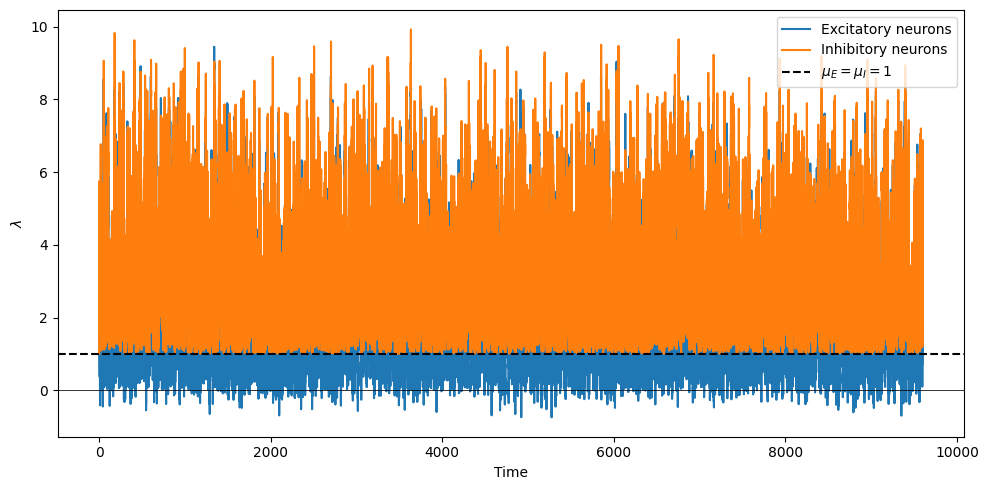

In [2]:
nmax = 10**5
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

fig = plt.figure(figsize=(10, 5))
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


([], [])

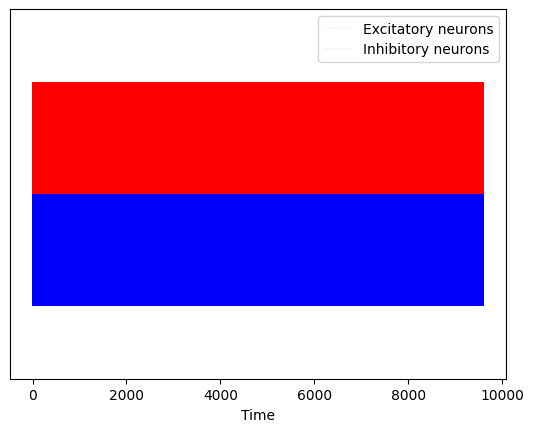

In [3]:
plt.eventplot(t_E, linelengths=0.5, linewidths=0.05, color = 'red', label = 'Excitatory neurons')
plt.eventplot(t_I, linelengths=0.5, linewidths=0.05, color = 'blue', lineoffsets= 0.5, label = 'Inhibitory neurons')
plt.xlabel('Time')
plt.ylabel('')
plt.legend()
plt.yticks([])


# Statistics

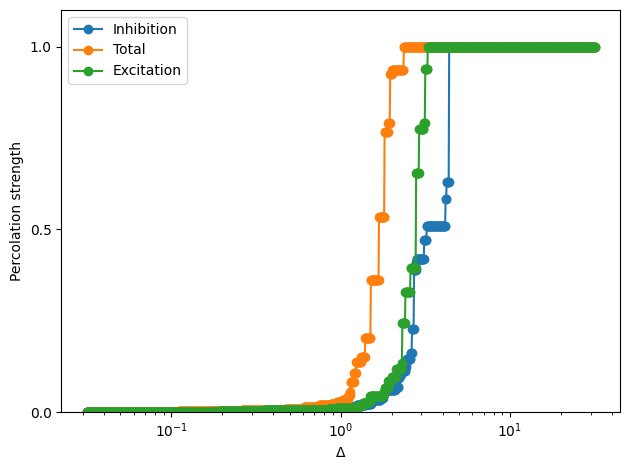

In [4]:
deltas = np.logspace(-1.5, 1.5, base= 10, num = 1000)
percolation_strength_exc = calculate_percolation_strength(np.diff(t_E), deltas)
percolation_strength_inh = calculate_percolation_strength(np.diff(t_I), deltas)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength_tot = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength_inh, marker = 'o', label = 'Inhibition')
plt.plot(deltas, percolation_strength_tot, marker = 'o', label = 'Total')
plt.plot(deltas, percolation_strength_exc, marker = 'o', label = 'Excitation')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.legend()

plt.tight_layout()

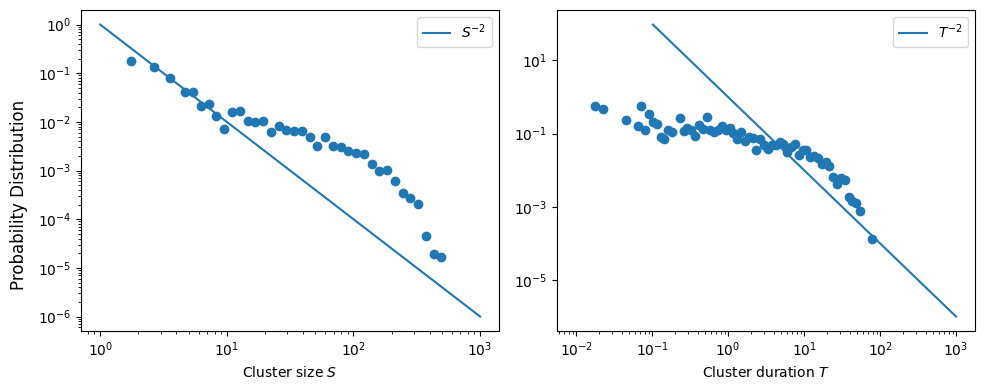

In [25]:
delta = 10**0
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-2, 3, num = 100)
yt = t_bins**-2
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[20:], yt[20:], label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 1$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

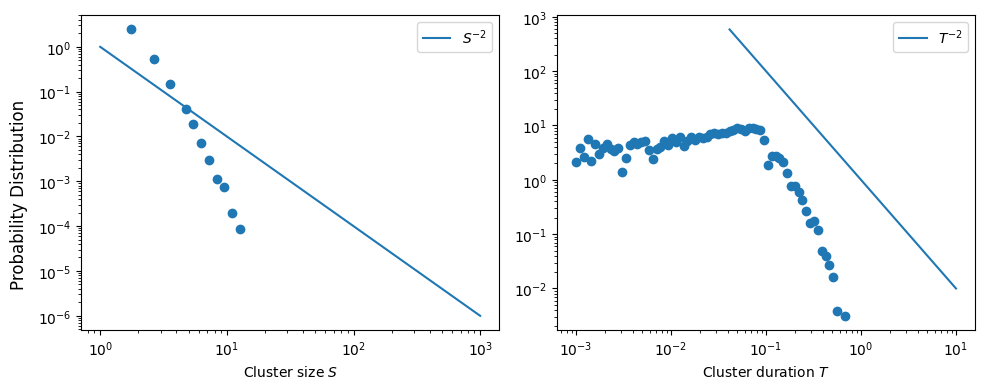

In [31]:
#deltas = np.logspace(-4, 1, base= 10, num = 5)

delta = 10**-1
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(0, 3, num = 50)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-3, 1, num = 100)
yt = t_bins**-2
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins[40:], yt[40:], label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-1}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()

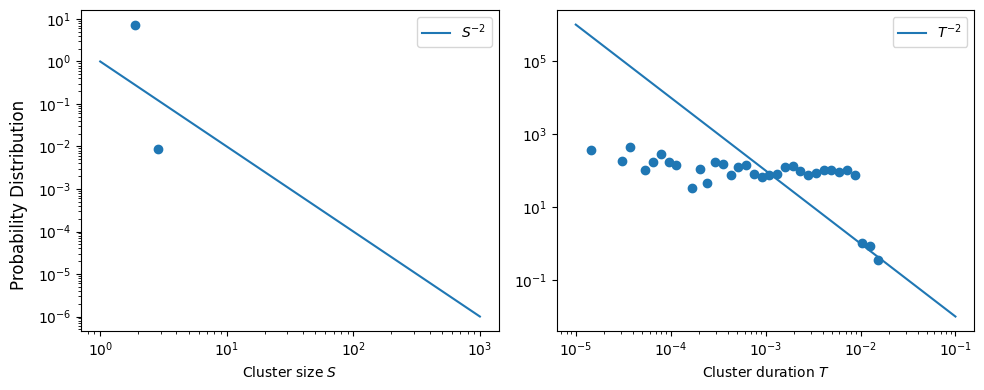

In [39]:
#deltas = np.logspace(-4, 1, base= 10, num = 5)

delta = 10**-2
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]


fig = plt.figure(figsize=(10, 4))
axgrid = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(axgrid[0, 0])
ax1 = fig.add_subplot(axgrid[0, 1])

s_bins = np.logspace(-0, 3, num = 100)
ys = s_bins**-2
s_hist = np.histogram(cluster_sizes, bins = s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0], marker = 'o')
ax0.plot(s_bins, ys, label = '$S^{-2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.legend()

t_bins = np.logspace(-5, -1, num = 50)
yt = t_bins**-2*10**-4
t_hist = np.histogram(cluster_times, bins = t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0], marker = 'o')
ax1.plot(t_bins, yt, label = '$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.legend()

fig.suptitle('$\Delta = 10^{-2}$')
fig.supylabel('Probability Distribution')
plt.tight_layout()